# Telemarketing example

A popular strategy in direct marketing is the telemarketing phonecalls; even if this kind of intervention is a low-cost alternative, the sucess of its implementation relies in the proper targeting of potential clients.

The following dataset provide information on the the success of telemarketing calls for selling a particular bank product. The dataset contains different features types. Namely:

Client information:
- age: Age of the potential client
- job: admin., blue- collar, entrepreneur, housemaid...
- marital_status: married, single, unknown
- education:basic.4y,basic.6y,basic.9y,high.school,illiterate,...

Client-Bank Relation
- default: The client has credit in default: no,yes,unknown 
- housing: The client has a housing loan contract: no,yes,unknown
- loan:	The client has a personal loan: no,yes,unknown

Campain
- contact: Communication type (cellular,telephone)
- month: Last month contacted (jan, feb ,..., dec)
- day_of_week: Last contact day : (mon, tue,..., fri)  
- duration: Last contact duration (in seconds)
- campain: Number of contacts performed during this campaign
- pdays: of days that passed by after last contact (999 if the client was not previously contacted)
- previous: Number of contacts performed before this campaign
- poutcome: Outcome of the previous marketing campaign: failure,nonexistent,success

Economic indicators
- emp.var.rate: numerical	Employment variation rate in the last quarter 
- cons.price.idx: numerical	Consumer price index in the last month
- cons.conf.idx: numerical	Monthly consumer confidence index
- euribor3m: numerical	Dayly Euro Interbank Offered Rate
- nr.employed: numerical	Number of employeed in the last quarter


## Data import

In [61]:
import pandas as pd
import numpy as np

%matplotlib inline
import seaborn as sns
import matplotlib.pyplot as plt

df = pd.read_csv('telemarketing.csv')


In [62]:
df.head(3)

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,target
0,56,admin.,married,basic.9y,no,yes,no,cellular,aug,wed,...,1,4,1,success,-2.9,92.201,-31.4,0.879,5076.2,1
1,52,admin.,single,university.degree,no,yes,no,cellular,jun,mon,...,1,999,0,nonexistent,-2.9,92.963,-40.8,1.266,5076.2,1
2,45,housemaid,married,basic.4y,no,no,no,cellular,aug,wed,...,5,999,0,nonexistent,1.4,93.444,-36.1,4.964,5228.1,0


In [63]:
df.dtypes

#if wrond dtype
#df['col_dt'] = pd.to_datetime(df['old_col'])
#df['col_num'] = pd.to_numeric(df['old_col'])

age                 int64
job                object
marital            object
education          object
default            object
housing            object
loan               object
contact            object
month              object
day_of_week        object
duration            int64
campaign            int64
pdays               int64
previous            int64
poutcome           object
emp.var.rate      float64
cons.price.idx    float64
cons.conf.idx     float64
euribor3m         float64
nr.employed       float64
target              int64
dtype: object

In [ ]:
df.isnull().sum()

## Split categorical/continuos variables

In [65]:
df.dtypes

age                 int64
job                object
marital            object
education          object
default            object
housing            object
loan               object
contact            object
month              object
day_of_week        object
duration            int64
campaign            int64
pdays               int64
previous            int64
poutcome           object
emp.var.rate      float64
cons.price.idx    float64
cons.conf.idx     float64
euribor3m         float64
nr.employed       float64
target              int64
dtype: object

In [66]:
df_categorical=df.select_dtypes(include=['object'])
df_categorical.head()

,job,marital,education,default,housing,loan,contact,month,day_of_week,poutcome
0,admin.,married,basic.9y,no,yes,no,cellular,aug,wed,success
1,admin.,single,university.degree,no,yes,no,cellular,jun,mon,nonexistent
2,housemaid,married,basic.4y,no,no,no,cellular,aug,wed,nonexistent
3,management,single,university.degree,no,no,no,telephone,may,tue,nonexistent
4,technician,single,university.degree,no,yes,yes,cellular,nov,fri,nonexistent


In [67]:
df_numerical=df.select_dtypes(include=[np.number])
df_numerical.head()

,age,duration,campaign,pdays,previous,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,target
0,56,73,1,4,1,-2.9,92.201,-31.4,0.879,5076.2,1
1,52,327,1,999,0,-2.9,92.963,-40.8,1.266,5076.2,1
2,45,188,5,999,0,1.4,93.444,-36.1,4.964,5228.1,0
3,32,237,2,999,0,1.1,93.994,-36.4,4.857,5191.0,0
4,32,1162,2,999,0,-0.1,93.200,-42.0,4.021,5195.8,0


In [68]:
#if you forget about np.number
df_numerical=df.select_dtypes(include=['int','float'])
df_numerical.head()

,age,duration,campaign,pdays,previous,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,target
0,56,73,1,4,1,-2.9,92.201,-31.4,0.879,5076.2,1
1,52,327,1,999,0,-2.9,92.963,-40.8,1.266,5076.2,1
2,45,188,5,999,0,1.4,93.444,-36.1,4.964,5228.1,0
3,32,237,2,999,0,1.1,93.994,-36.4,4.857,5191.0,0
4,32,1162,2,999,0,-0.1,93.200,-42.0,4.021,5195.8,0


## Categorical data

In [69]:
df_categorical.shape

(15000, 10)

In [70]:
df.marital.value_counts()

marital
married     8934
single      4389
divorced    1651
unknown       26
Name: count, dtype: int64

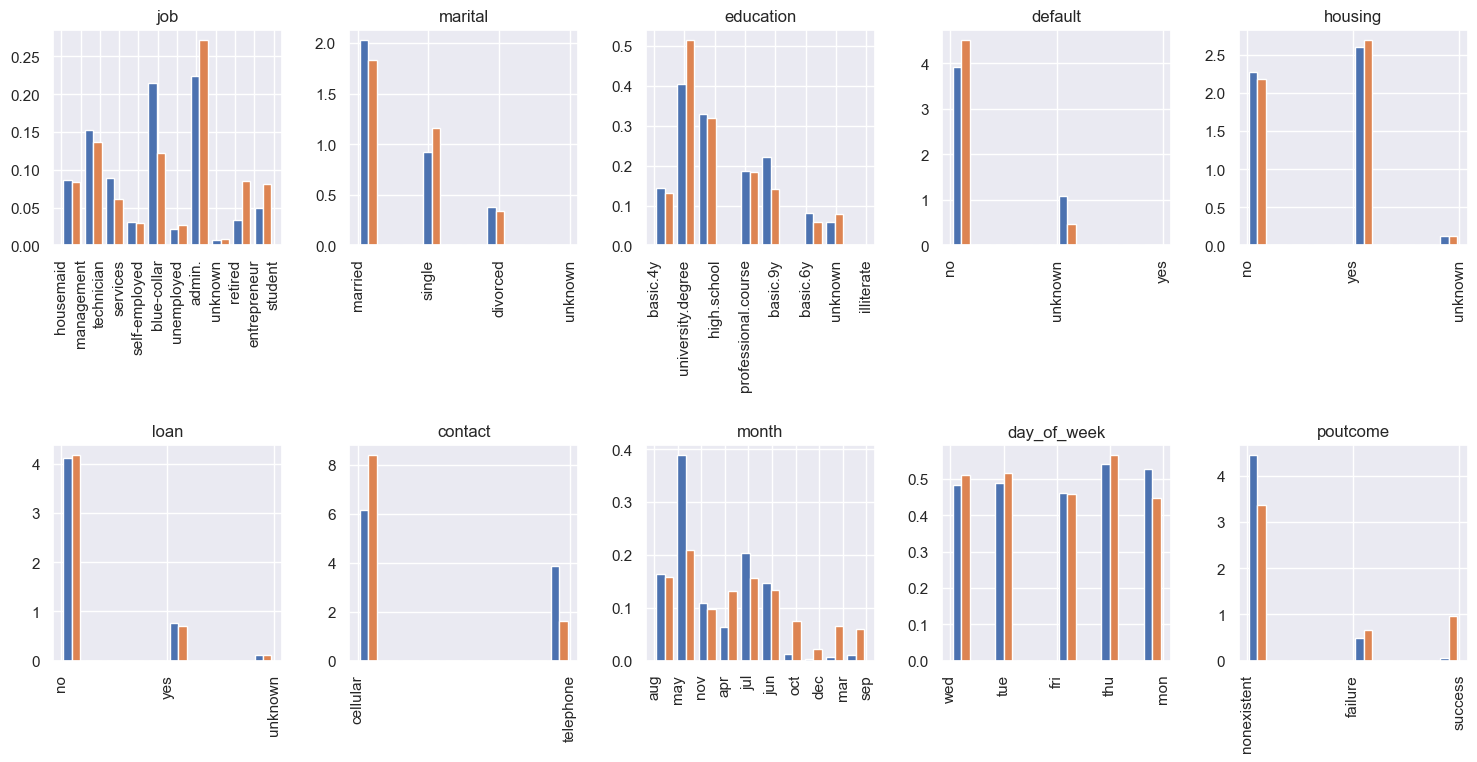

In [71]:
df_0=df_categorical[df['target']==0] # records wih target==0
df_1=df_categorical[df['target']==1] # records wih target==1


fig, axes = plt.subplots(2, 5,figsize=[15,7])
axes = axes.flatten()
fig.tight_layout(h_pad=10)

i=0
for x in df_categorical.columns:
    plt.sca(axes[i]) # set the current Axes
    plt.hist([df_0[x],df_1[x]],density=True)
    plt.xticks(rotation = 90) # Rotates X-Axis Ticks by 45-degrees
    plt.title(x)
    i+=1
plt.show()


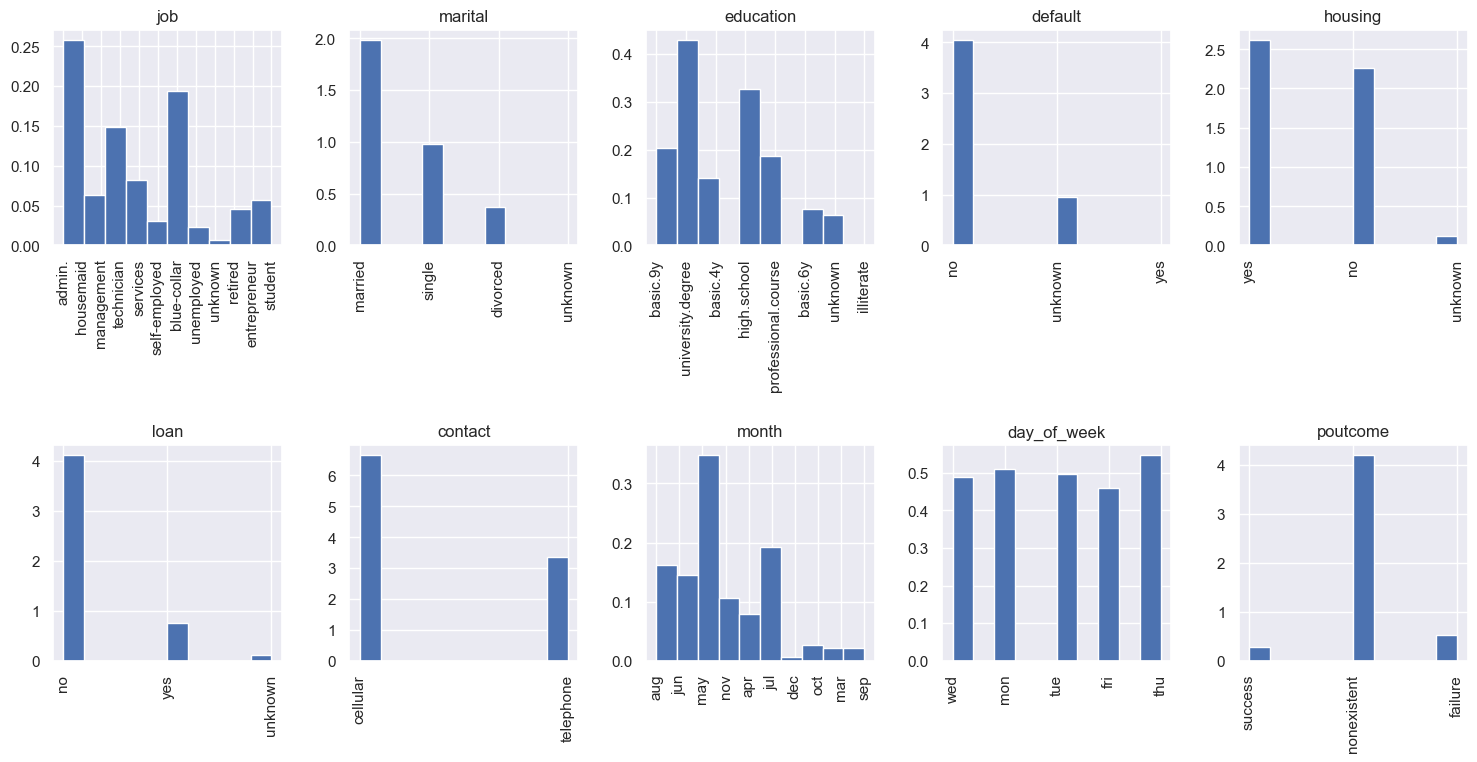

In [72]:
fig, axes = plt.subplots(2, 5,figsize=[15,7])
axes = axes.flatten()
fig.tight_layout(h_pad=10)

i=0
for x in df_categorical.columns:
    plt.sca(axes[i]) # set the current Axes
    plt.hist(df_categorical[x],density=True)
    plt.xticks(rotation = 90) # Rotates X-Axis Ticks by 45-degrees
    plt.title(x)
    i+=1
plt.show()

In [73]:
selection_categorical=['job', 'marital', 'education', 'default','contact', 'month', 'poutcome']

dummies = pd.get_dummies(df_categorical[selection_categorical]) 

dummies.tail()

,job_admin.,job_blue-collar,job_entrepreneur,job_housemaid,job_management,job_retired,job_self-employed,job_services,job_student,job_technician,...,month_jul,month_jun,month_mar,month_may,month_nov,month_oct,month_sep,poutcome_failure,poutcome_nonexistent,poutcome_success
14995,True,False,False,False,False,False,False,False,False,False,...,False,False,False,True,False,False,False,False,True,False
14996,False,False,False,True,False,False,False,False,False,False,...,True,False,False,False,False,False,False,False,True,False
14997,False,False,False,False,True,False,False,False,False,False,...,False,False,False,True,False,False,False,True,False,False
14998,True,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,True,False
14999,True,False,False,False,False,False,False,False,False,False,...,False,True,False,False,False,False,False,False,True,False


## Numerical data

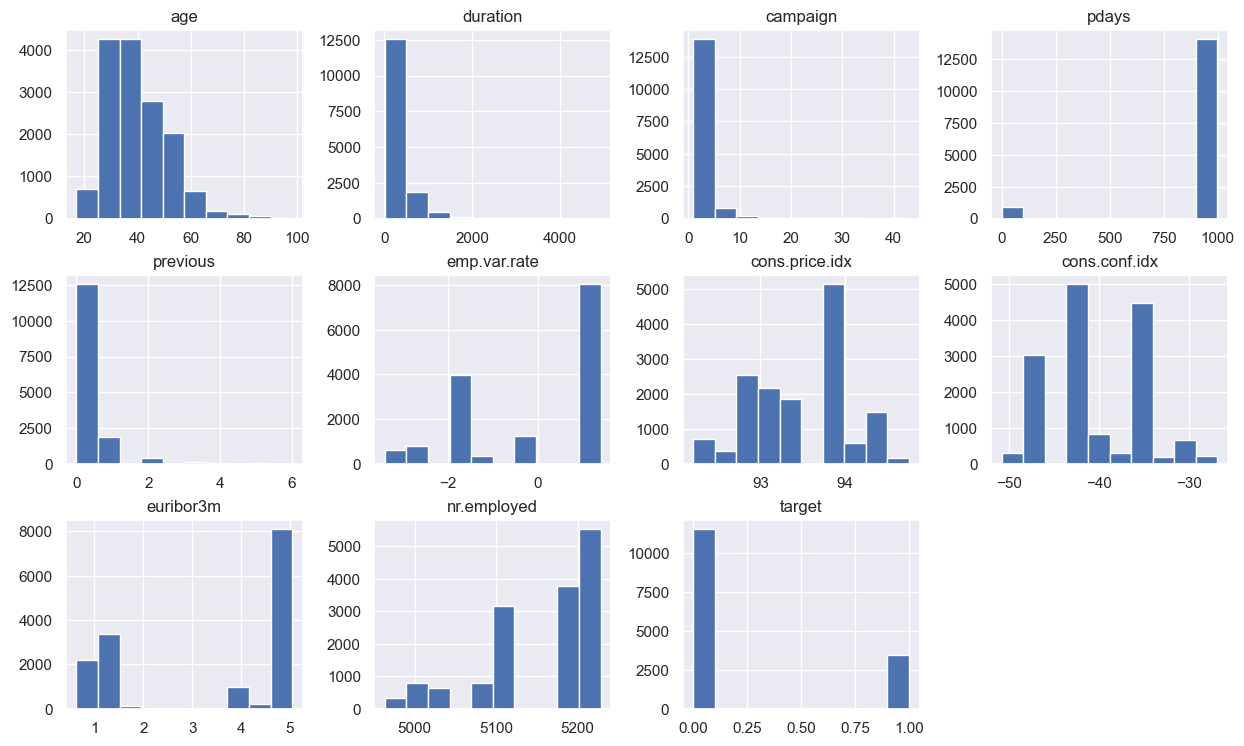

In [74]:
df_hist=df_numerical.hist(layout=(4,4), figsize=(15,12))

In [75]:
import math
pd.options.mode.chained_assignment = None # no warning on creating a new column

df_numerical['logcampaign']=df_numerical['campaign'].apply(lambda x: math.log(x+1))
df_numerical['logduration']=df_numerical['duration'].apply(lambda x: math.log(x+1))
df_numerical['logprevious']=df_numerical['previous'].apply(lambda x: math.log(x+1))

In [76]:
df_numerical.head(3)

,age,duration,campaign,pdays,previous,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,target,logcampaign,logduration,logprevious
0,56,73,1,4,1,-2.9,92.201,-31.4,0.879,5076.2,1,0.693147,4.304065,0.693147
1,52,327,1,999,0,-2.9,92.963,-40.8,1.266,5076.2,1,0.693147,5.793014,0.000000
2,45,188,5,999,0,1.4,93.444,-36.1,4.964,5228.1,0,1.791759,5.241747,0.000000


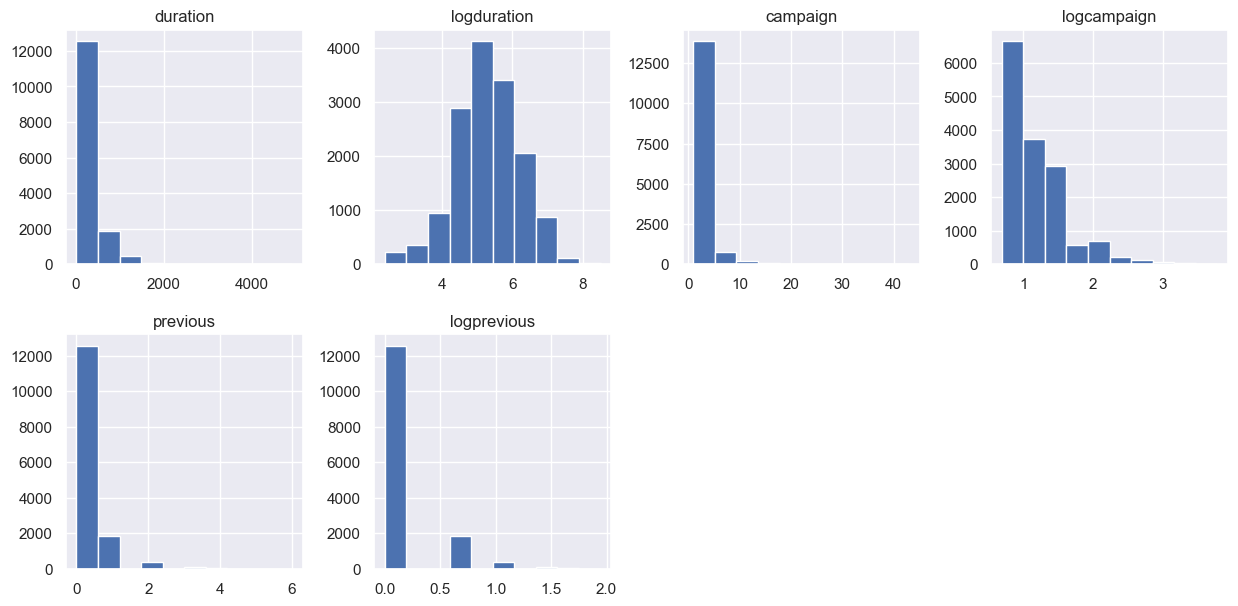

In [77]:
df_hist=df_numerical[['duration','logduration', 'campaign','logcampaign','previous','logprevious']].hist(layout=(2,4), figsize=(15,7))

In [78]:
df_numerical.columns

Index(['age', 'duration', 'campaign', 'pdays', 'previous', 'emp.var.rate',
       'cons.price.idx', 'cons.conf.idx', 'euribor3m', 'nr.employed', 'target',
       'logcampaign', 'logduration', 'logprevious'],
      dtype='object')

In [79]:
selection_numerical=['age', 'logduration', 'logcampaign', 'pdays', 'logprevious', 'emp.var.rate',
       'cons.price.idx', 'cons.conf.idx', 'euribor3m', 'nr.employed', 'target']
df_selection_numerical=df_numerical[selection_numerical]

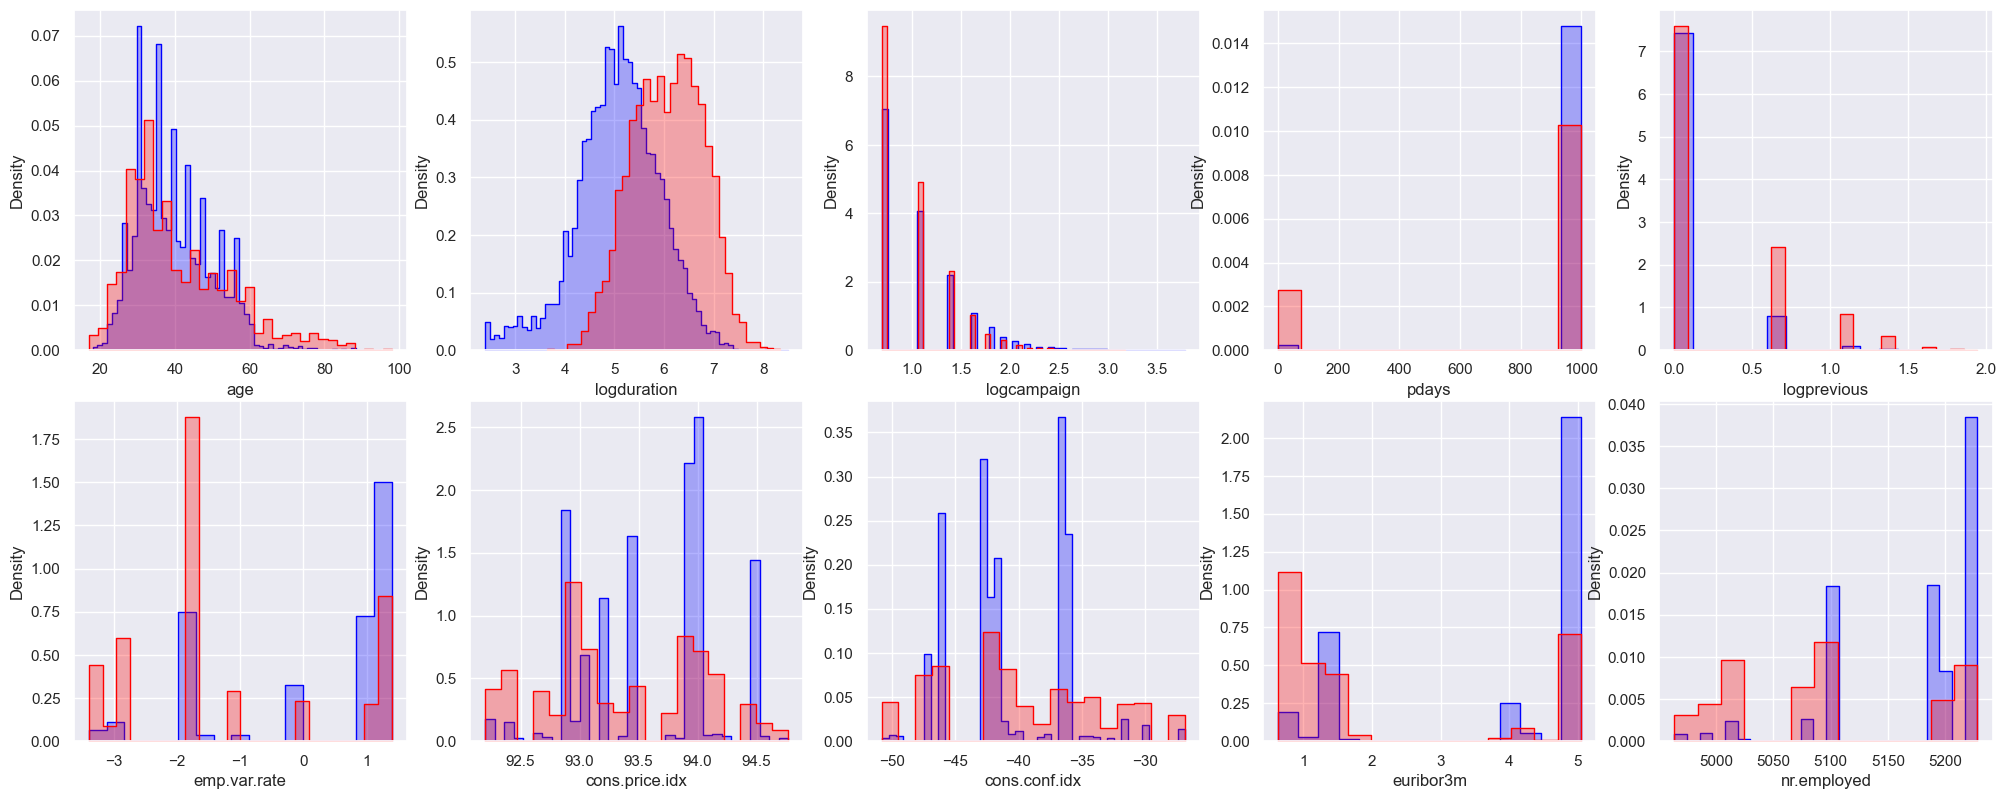

In [80]:
%matplotlib inline
import seaborn as sns
import matplotlib.pyplot as plt


X0 = df_selection_numerical[df_selection_numerical['target']==0]
X1 = df_selection_numerical[df_selection_numerical['target']==1]

fig, axes = plt.subplots(ncols=5, nrows=2, figsize=(20,8))
fig.tight_layout()

for i, ax in zip(range(df_selection_numerical.columns.size), axes.flat):
    sns.histplot(X0.iloc[:,i], color="blue", ax=ax, stat='density', element="step",  alpha=0.3)
    sns.histplot(X1.iloc[:,i], color="red", ax=ax,stat='density', element="step",  alpha=0.3)
plt.show()

In [ ]:
sns.pairplot(df_selection_numerical, hue='target')

## Standarize

In [ ]:
from sklearn.preprocessing import StandardScaler

independent_variables=df_selection_numerical.iloc[:,:-1] #no target

scaler = StandardScaler().fit(independent_variables) # No target
scaled_df = pd.DataFrame(scaler.transform(independent_variables))
scaled_df.columns = independent_variables.columns

scaled_df.tail()

In [ ]:
# Save the scaler
import pickle
pickle.dump(scaler, open('scaler.pkl', 'wb'))


In [ ]:
scaled_df.boxplot(rot=90)

In [ ]:
scaled_df.tail()

In [ ]:
X_numerical=scaled_df

In [ ]:
print(dummies.shape)
print(X_numerical.shape)

dummies.tail()

In [ ]:
X=pd.concat([dummies,X_numerical], axis = 1)
X.tail()

### Separate Train/Test sets


In [ ]:
y=df['target']

In [ ]:
y.shape

In [ ]:
from sklearn.model_selection import train_test_split

#SPLIT DATA INTO TRAIN AND TEST SET
X_train, X_test, y_train, y_test = train_test_split(X, y, 
                                                    test_size =0.30, #by default is 75%-25%
                                                    stratify=y, #preserve target propotions 
                                                    random_state= 321) #fix random seed for replicability

print(X_train.shape, X_test.shape)

## Models

In [ ]:
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn import metrics 
from sklearn.metrics import f1_score
from sklearn.metrics import precision_score

In [ ]:
# KNN
from sklearn.neighbors import KNeighborsClassifier

classifier = KNeighborsClassifier()
parameters = {'n_neighbors':np.arange(10,500,20)}

def hyperp_search(classifier, parameters):
    gs = GridSearchCV(classifier, parameters, cv=3, scoring = 'f1', verbose=0, n_jobs=-1)
    gs = gs.fit(X_train, y_train)
    print("f1_train: %f using %s" % (gs.best_score_, gs.best_params_))

    best_model = gs.best_estimator_
    y_pred = best_model.predict(X_test)
    y_pred_train = best_model.predict(X_train)

    print("f1         train %.3f   test %.3f" % (f1_score(y_train, y_pred_train), f1_score(y_test, y_pred) )) 
    print("precision  train %.3f   test %.3f" % (precision_score(y_train, y_pred_train), precision_score(y_test, y_pred) )) 
    print("")
    print(confusion_matrix(y_test, y_pred))
    #print(classification_report(y_test, y_pred))



In [ ]:
hyperp_search(classifier,parameters)

In [ ]:
model_knn = KNeighborsClassifier(n_neighbors=30)

def roc(model,X_train,y_train,X_test,y_test):
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)

    y_probs = model.predict_proba(X_test) #predict_proba gives the probabilities for the target (0 and 1 in your case) 

    fpr, tpr, thresholds1=metrics.roc_curve(y_test,  y_probs[:,1])

    import matplotlib.pyplot as plt
    plt.plot(fpr, tpr, label='ROC')
    plt.plot([0, 1], [0, 1], color='darkblue', linestyle='--')
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver Operating Characteristic (ROC) Curve')
    plt.legend()
    plt.show()

    auc = metrics.roc_auc_score(y_test, y_probs[:,1])
    print('AUC: %.2f' % auc)
    return (fpr, tpr)

fpr1,tpr1=roc(model_knn,X_train,y_train,X_test,y_test)

In [ ]:
#Tree

from sklearn.tree import DecisionTreeClassifier
classifier = DecisionTreeClassifier()
parameters = {'criterion': ['entropy','gini'], 
              'max_depth': [4,5,6,8,10],
              'min_samples_split': [5,10,20],
              'min_samples_leaf': [5,10,20]}

hyperp_search(classifier,parameters)


In [ ]:
model_tree = DecisionTreeClassifier(criterion='entropy', max_depth=5, min_samples_leaf=10, min_samples_split=20)

fpr2,tpr2=roc(model_tree,X_train,y_train,X_test,y_test)


## Plotting the tree 

In [ ]:
from sklearn import tree
r = tree.export_text(model_tree,feature_names=X_test.columns.tolist(),max_depth=4)
print(r)


In [ ]:
# Naive Bayes
from sklearn.naive_bayes import GaussianNB #or alternative NB implementations

model = GaussianNB()

model.fit(X_train, y_train)
y_pred=model.predict(X_test)

from sklearn.metrics import f1_score
print("f1_score: ", f1_score(y_test, y_pred))

print("f1_test: ", f1_score(y_test, y_pred))


print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

In [ ]:
y_probs = model.predict_proba(X_test) #predict_proba gives the probabilities for the target (0 and 1 in your case) 

fpr3,tpr3=roc(model,X_train,y_train,X_test,y_test)


In [ ]:
# Logistic

from sklearn.linear_model import LogisticRegression

classifier = LogisticRegression()
parameters = {"C":[1e-4,1e-3,1e-2,1e-1,1,10], "max_iter":[1000] }


hyperp_search(classifier,parameters)


In [ ]:
model = LogisticRegression(C=10, max_iter=1000)

fpr4,tpr4=roc(model,X_train,y_train,X_test,y_test)


In [ ]:
model.fit(X_train,y_train)

coeff=pd.DataFrame()
coeff["feature"]=X_train.columns
coeff["w"]=model.coef_[0]

coeff.sort_values(by=['w'], inplace=True)

In [ ]:
sns.set(rc={'figure.figsize':(10,10)})
sns.barplot(data=coeff, y="feature", x="w", palette="Blues_d", orient="h")
sns.set(rc={'figure.figsize':(6,4)})


In [ ]:
#SVM

from sklearn.svm import SVC

classifier = SVC()
parameters = {"kernel":['linear','rbf'], "C":[0.1,100]}

hyperp_search(classifier,parameters)

In [ ]:
model = SVC(C=100, kernel='linear',probability=True)

fpr5,tpr5=roc(model,X_train,y_train,X_test,y_test)


In [ ]:
# Multi-layer Perceptron classifier

from sklearn.neural_network import MLPClassifier

classifier = MLPClassifier()
parameters = {"hidden_layer_sizes":[(10, 5),(100,20,5)],  "max_iter": [2000], "alpha": [0.001,0.1]}

hyperp_search(classifier,parameters)

In [ ]:
model_MLP=MLPClassifier(hidden_layer_sizes=(10,5), alpha=0.1, max_iter=2000)

fpr6,tpr6=roc(model_MLP,X_train,y_train,X_test,y_test)

In [ ]:
plt.plot(fpr1, tpr1, label= "KNN")
plt.plot(fpr2, tpr2, label= "Tree")
plt.plot(fpr3, tpr3, label= "NB")
plt.plot(fpr4, tpr4, label= "Logistic")    
plt.plot(fpr5, tpr5, label= "SVM")
plt.plot(fpr6, tpr6, label= "NeuralNet")
plt.plot([0, 1], [0, 1], color='darkblue', linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend()
plt.show()


## Save the model

In [ ]:
import pickle

In [ ]:
pickle.dump(model_tree, open('tree_model.pkl', 'wb'))

## Making predictions

In [ ]:
import pickle
import pandas as pd
import numpy as np
import math
from sklearn.metrics import f1_score, classification_report, confusion_matrix

In [ ]:
# load scaler modand el
loaded_scaler = pickle.load(open('scaler.pkl', 'rb'))
loaded_model = pickle.load(open('tree_model.pkl', 'rb'))

In [ ]:
df2 = pd.read_csv('telemarketing_pred_withtarget.csv')

In [ ]:
#pd.options.mode.chained_assignment = None  # default='warn'

df2_categorical=df2.select_dtypes(include=['object'])

# Categorical
selection_categorical=['job', 'marital', 'education', 'default','contact', 'month', 'poutcome']
dummies2 = pd.get_dummies(df2_categorical[selection_categorical]) 
    
# Numerical
df2_numerical=df2.select_dtypes(include=[np.number])
df2_numerical.loc[:,'logcampaign']=df2_numerical['campaign'].apply(lambda x: math.log(x+1))
df2_numerical.loc[:,'logduration']=df2_numerical['duration'].apply(lambda x: math.log(x+1))
df2_numerical.loc[:,'logprevious']=df2_numerical['previous'].apply(lambda x: math.log(x+1))

# Scaling - WE MUST USE THE SAME SCALING OF THE TRAIN!
selection_numerical=['age', 'logduration', 'logcampaign', 'pdays', 'logprevious', 'emp.var.rate',
       'cons.price.idx', 'cons.conf.idx', 'euribor3m', 'nr.employed'] # no target
df2_selection_numerical=df2_numerical[selection_numerical]
scaled_df2 = pd.DataFrame(loaded_scaler.transform(df2_selection_numerical))
scaled_df2.columns = df2_selection_numerical.columns

# Feature selection

X2=pd.concat([dummies2,scaled_df2], axis = 1)


In [ ]:
X2

In [ ]:
X2.default_yes.value_counts()

In [ ]:
y_tree_predictions = loaded_model.predict(X2)

In [ ]:
y2=df2.target
print("f1: ", f1_score(y2,y_tree_predictions))
print(confusion_matrix(y2,y_tree_predictions))
print(classification_report(y2,y_tree_predictions))